In [6]:
import numpy as np
import cv2 as cv
from PIL import Image
from matplotlib import pyplot as plt

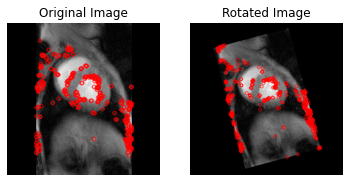

In [7]:
def draw_keypoints(img, kp):
    img_kp = cv.drawKeypoints(img, kp, None, color=(255, 0, 0), flags=0)
    return img_kp

# Load the image
img = Image.open('heart.jpg')

# Rotate the image
img_rotated = img.rotate(15, expand=True)

# Save the rotated image
img_rotated.save('heart.15.jpg')

# Convert PIL images to OpenCV images (numpy arrays)
img = np.array(img)
img_rotated = np.array(img_rotated)

# Convert to grayscale for feature detection
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_rotated_gray = cv.cvtColor(img_rotated, cv.COLOR_BGR2GRAY)

# Initiate ORB detector
orb = cv.ORB_create()

# Find the keypoints with ORB
key_pt1 = orb.detect(img_gray, None)
key_pt2 = orb.detect(img_rotated_gray, None)

# Compute the descriptors with ORB
key_pt1, des1 = orb.compute(img_gray, key_pt1)
key_pt2, des2 = orb.compute(img_rotated_gray, key_pt2)

# Draw keypoints
img_key_pt1 = draw_keypoints(img_gray, key_pt1)
img_key_pt2 = draw_keypoints(img_rotated_gray, key_pt2)

# Display original image and rotated image with keypoints
plt.figure()
plt.subplot(121)
plt.imshow(img_key_pt1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(img_key_pt2, cmap='gray')
plt.title('Rotated Image')
plt.axis('off')
plt.show()


## Main steps and methods:

Grayscale Conversion: The images are converted to grayscale using cv.cvtColor, as the ORB detector operates on grayscale images.

ORB Feature Detection: An ORB (Oriented FAST and Rotated BRIEF) detector is created with cv.ORB_create(). This detector is used to find significant points (keypoints) in the images.

Keypoint Detection: The ORB detector's detect method is used to find keypoints in the grayscale images, providing a set of points that can be reliably recognized across different images of the same scene.

Descriptor Computation: The ORB detector's compute method calculates "descriptors" for each keypoint. Descriptors are compact vectors that describe the keypoints in a way that is robust to changes in image rotation and illumination, allowing keypoints to be compared between images.

Keypoint Visualization: The keypoints are visualized on the grayscale images using OpenCV's drawKeypoints function. This function draws each keypoint as a red dot.

Reference: ORB (Oriented FAST and Rotated BRIEF), https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html